# Model Calculation BMR Daily Calories Needs & Food Prefensi User

## Requirements Python
**Python Version: 3.9**

**Library Python**
| **Package**                  | **Version**  |
|------------------------------|--------------|
| matplotlib                   | 3.9.2        |
| numpy                        | 1.24.3       |
| pandas                       | 2.2.3        |
| pip                          | 24.3.1       |
| seaborn                      | 0.13.2       |
| tensorflow                   | 2.10.1       |
| tensorflow-estimator         | 2.9.0        |
| tensorflow-io-gcs-filesystem | 0.31.0       |
| termcolor                    | 2.5.0        |
| scikit-learn                 | 1.2.2        |
| scikit-learn-extra           | 0.2.0        |
| regex                        | 2023.9.0     |

## Import Library

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Import Dataset

In [3]:
df_cleaned = pd.read_csv('../data/Diet Plan Recommendation/cleaned_dataset.csv')
df_combined = pd.read_csv('../data/combine-dataset-kategori.csv')

In [4]:
# Display dataset head for reference
print(df_cleaned.head())
print(df_combined.head())

   age  weight(kg)  height(cm)  gender        BMI      BMR  activity_level  \
0    2   16.097862   93.202488       1  18.531612  958.584             1.2   
1    4   14.619374   91.668688       1  17.397496  932.383             1.7   
2    4   17.899918   99.728772       1  17.997414  977.578             1.9   
3    3   13.532880  102.278630       1  12.936609  944.689             1.9   
4    4   17.039484  105.397666       0  15.338909  799.229             1.9   

   calories_to_maintain_weight  
0                    1150.3008  
1                    1585.0511  
2                    1857.3982  
3                    1794.9091  
4                    1518.5351  
              Name  Calories  Protein(g)  Fat(g)  SaturatedFat(g)  \
0       cornstarch     381.0        0.26    0.05              0.0   
1     nuts, pecans     691.0        9.17   71.97              6.2   
2    eggplant, raw      25.0        0.98    0.18              0.0   
3   teff, uncooked     367.0       13.30    2.38         

## Data Preparation

### Check Data Missing Values

In [5]:
# Basic info and statistics of the dataset
df_cleaned.info()

# Check for missing values
df_cleaned.isnull().sum()

# Display basic statistics of the numeric columns
df_cleaned.describe()

# Basic info and statistics of the dataset
df_combined.info()

# Check for missing values
df_combined.isnull().sum()

# Display basic statistics of the numeric columns
df_combined.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10726 non-null  int64  
 1   weight(kg)                   10726 non-null  float64
 2   height(cm)                   10726 non-null  float64
 3   gender                       10726 non-null  int64  
 4   BMI                          10726 non-null  float64
 5   BMR                          10726 non-null  float64
 6   activity_level               10726 non-null  float64
 7   calories_to_maintain_weight  10726 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 670.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530037 entries, 0 to 530036
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             530003 non-null  object 
 1   Cal

,Calories,Protein(g),Fat(g),SaturatedFat(g),Cholesterol(mg),Sodium(mg),Carbohydrate(g),Fiber(g),Sugar(g)
count,530037.000000,530037.000000,530037.000000,530037.000000,530037.000000,5.300370e+05,530037.000000,530037.000000,530037.000000
mean,480.265576,17.374219,24.385431,9.459898,85.726848,7.599683e+02,48.653592,3.814849,21.627920
std,1387.303841,39.858058,110.696127,46.298233,300.223729,4.172720e+03,179.553306,8.557844,141.600563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,172.300000,3.500000,5.500000,1.400000,3.400000,1.198000e+02,12.500000,0.800000,2.400000
50%,314.700000,9.100000,13.600000,4.600000,42.000000,3.493000e+02,27.900000,2.100000,6.300000
75%,524.900000,24.900000,27.200000,10.700000,106.700000,7.852000e+02,51.000000,4.500000,17.700000
max,612854.600000,18396.200000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000


In [6]:
# Menghitung proporsi nilai kosong atau 0
threshold = 0.4  # Ambang batas 40%
cols_to_check = df_combined.columns[1:]  # Kecuali kolom "Name"
proportion_empty = (df_combined[cols_to_check] == 0).sum(axis=1) / len(cols_to_check)

# Filter data dengan proporsi nilai kosong atau 0 <= 40%
df_combined = df_combined[proportion_empty <= threshold]
df_combined

,Name,Calories,Protein(g),Fat(g),SaturatedFat(g),Cholesterol(mg),Sodium(mg),Carbohydrate(g),Fiber(g),Sugar(g),Diet_Type
0,cornstarch,381.0,0.26,0.05,0.0,0.0,9.0,91.27,0.9,0.00,Vegan
1,"nuts, pecans",691.0,9.17,71.97,6.2,0.0,0.0,13.86,9.6,3.97,Vegan
2,"eggplant, raw",25.0,0.98,0.18,0.0,0.0,2.0,5.88,3.0,3.53,Vegan
3,"teff, uncooked",367.0,13.30,2.38,0.4,0.0,12.0,73.13,8.0,1.84,Vegan
4,"sherbet, orange",144.0,1.10,2.00,1.2,1.0,46.0,30.40,1.3,24.32,Vegan
...,...,...,...,...,...,...,...,...,...,...,...
530032,meg's fresh ginger gingerbread,316.6,3.90,12.50,7.6,54.4,278.2,48.50,0.8,22.80,Vegan
530033,roast prime rib au poivre with mixed peppercorns,2063.4,117.00,172.40,71.4,433.8,766.3,3.20,0.7,0.10,Vegan
530034,kirshwasser ice cream,1271.3,12.80,117.20,72.6,470.9,192.5,33.90,0.0,17.30,Keto
530035,quick easy asian cucumber salmon rolls,16.1,2.40,0.60,0.1,2.9,100.5,0.30,0.0,0.10,Keto


In [7]:
# Define maximum values for each column
max_values = {
    'Calories': 2650,
    'Fat(g)': 100,
    'SaturatedFat(g)': 13,
    'Cholesterol(mg)': 300,
    'Sodium(mg)': 2300,
    'Carbohydrate(g)': 325,
    'Fiber(g)': 40,
    'Sugar(g)': 40,
    'Protein(g)': 200
}

# Apply filtering
filtered_data_combined = df_combined.copy()
for column, max_value in max_values.items():
    filtered_data_combined = filtered_data_combined[filtered_data_combined[column] <= max_value]

Terdapat Data Yang Hilang Sebanyak  0 Kolom, Dengan Nama Kolom : 
Series([], dtype: int64)


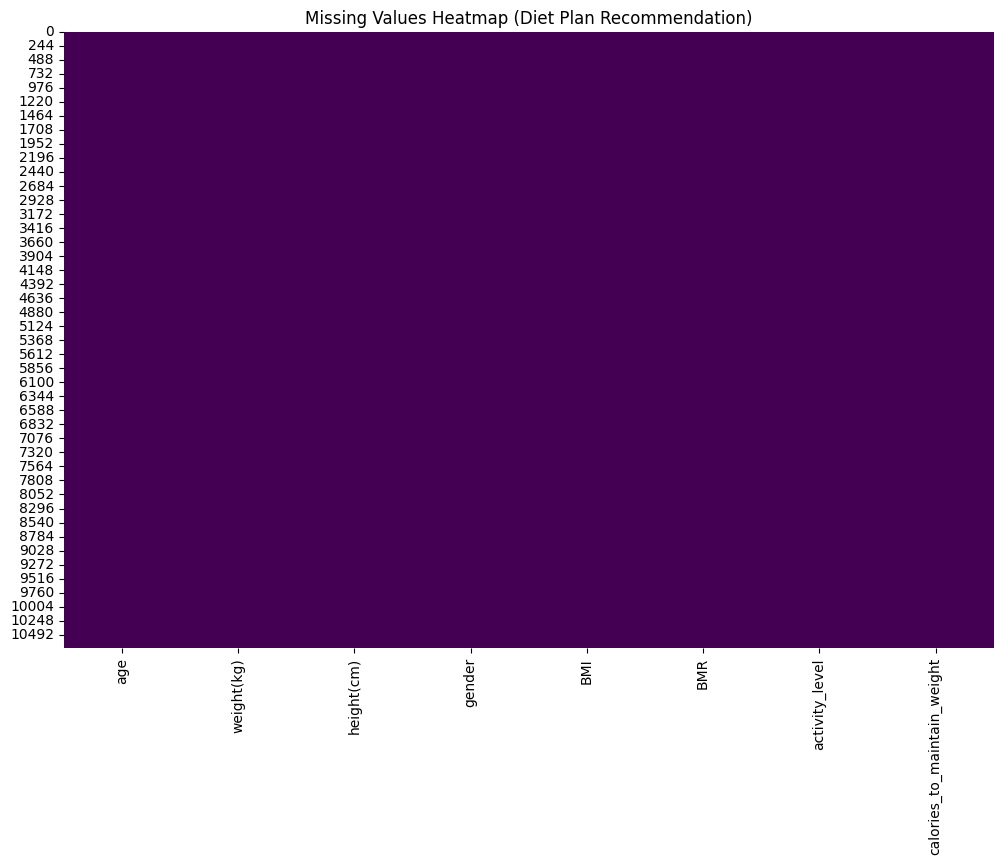

In [8]:
df_missing_values = df_cleaned.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Diet Plan Recommendation)")
plt.show()

Terdapat Data Yang Hilang Sebanyak  1 Kolom, Dengan Nama Kolom : 
Name    29
dtype: int64


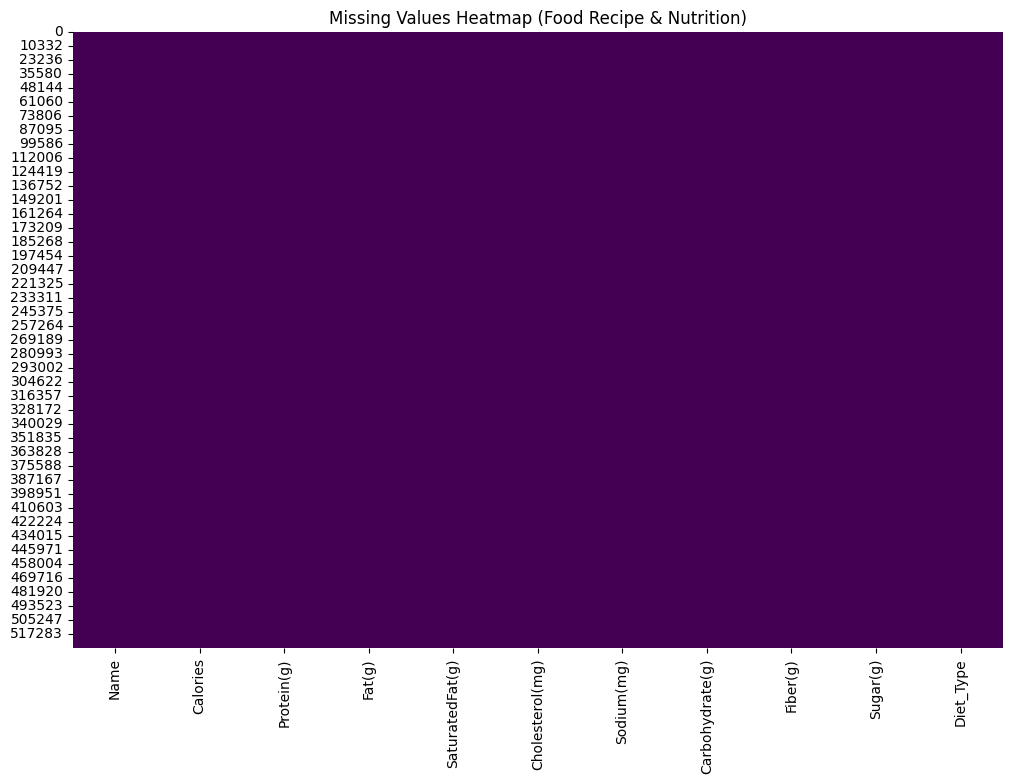

In [9]:
df_missing_values = filtered_data_combined.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data_combined.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Food Recipe & Nutrition)")
plt.show()

## Model Building

### Model 1: Predict Calories to Maintain Weight

In [10]:
# Features and target variable
x1_train = df_cleaned[['age', 'height(cm)', 'weight(kg)', 'gender', 'BMI', 'BMR', 'activity_level']]
y1_train = df_cleaned['calories_to_maintain_weight']

# Normalize features
scaler1 = StandardScaler()
x1_train_scaled = scaler1.fit_transform(x1_train)

# Split data
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1_train_scaled, y1_train, test_size=0.2, random_state=42)

# Define TensorFlow model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train1.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile the model
model1.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train the model
history1 = model1.fit(X_train1, y_train1, batch_size=300, epochs=100, validation_split=0.2)

# Evaluate the model
loss1, mae1 = model1.evaluate(X_test1, y_test1)
print(f"Model 1 Loss: {loss1}, Mean Absolute Error: {mae1}")

# Evaluate and calculate R-squared score for Model 1
loss1, mae1 = model1.evaluate(X_test1, y_test1)
y_pred1 = model1.predict(X_test1)
r2_1 = r2_score(y_test1, y_pred1)
print(f"Model 1 Loss: {loss1}, Mean Absolute Error: {mae1},\nModel 1 R-squared Score: {r2_1}")

Epoch 1/100
23/23 [==============================] - 2s 19ms/step - loss: 2115.4587 - mae: 2115.4587 - val_loss: 2113.3022 - val_mae: 2113.3018
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 2105.4280 - mae: 2105.4280 - val_loss: 2093.9907 - val_mae: 2093.9907
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 2066.8428 - mae: 2066.8428 - val_loss: 2026.2255 - val_mae: 2026.2255
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1949.3811 - mae: 1949.3811 - val_loss: 1840.9791 - val_mae: 1840.9791
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1662.7026 - mae: 1662.7026 - val_loss: 1432.4224 - val_mae: 1432.4224
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 1190.8984 - mae: 1190.8986 - val_loss: 971.7130 - val_mae: 971.7130
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 863.6390 - mae: 863.6390 - val_loss: 805.5761 - val_mae: 805.5761
Epoc

### Model 2: Predict BMR

In [11]:
# Features and target variable
x2_train = df_cleaned[['age', 'height(cm)', 'weight(kg)', 'gender']]
y2_train = df_cleaned['BMR']

# Normalize features
scaler2 = StandardScaler()
x2_train_scaled = scaler2.fit_transform(x2_train)

# Split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2_train_scaled, y2_train, test_size=0.2, random_state=42)

# Define TensorFlow model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile the model
model2.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train the model
history2 = model2.fit(X_train2, y_train2, batch_size=300, epochs=100, validation_split=0.2)

# Evaluate and calculate R-squared score for Model 2
loss2, mae2 = model2.evaluate(X_test2, y_test2)
y_pred2 = model2.predict(X_test2)
r2_2 = r2_score(y_test2, y_pred2)
print(f"Model 2 Loss: {loss2}, Mean Absolute Error: {mae2},\nModel 2 R-squared Score: {r2_2}")

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 1441.8909 - mae: 1441.8909 - val_loss: 1440.4304 - val_mae: 1440.4304
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1436.9404 - mae: 1436.9404 - val_loss: 1430.7808 - val_mae: 1430.7808
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1417.1791 - mae: 1417.1791 - val_loss: 1395.4125 - val_mae: 1395.4125
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1354.8304 - mae: 1354.8304 - val_loss: 1294.4767 - val_mae: 1294.4767
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1195.9878 - mae: 1195.9878 - val_loss: 1060.5236 - val_mae: 1060.5236
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 901.5757 - mae: 901.5757 - val_loss: 723.7508 - val_mae: 723.7508
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 567.0164 - mae: 567.0164 - val_loss: 430.5184 - val_mae: 430.5184
Epoch 8

### Visualisasi Training Loss dan Validation Loss

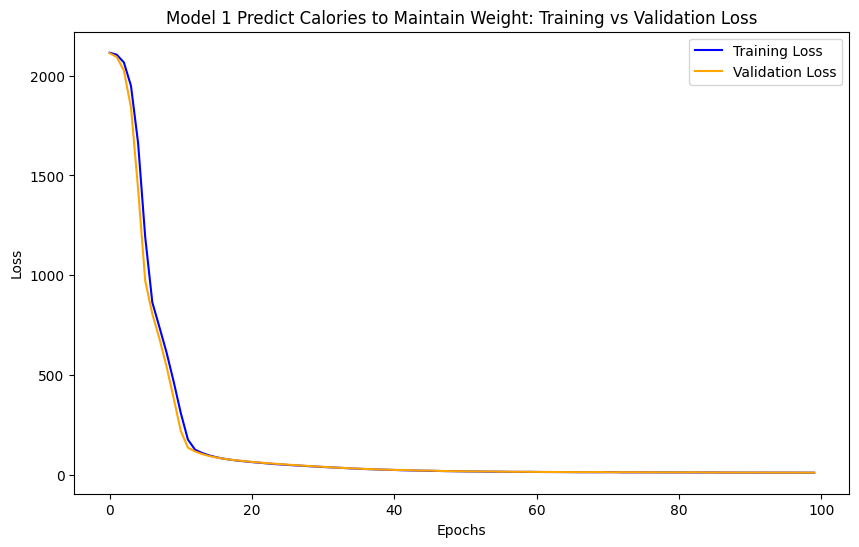

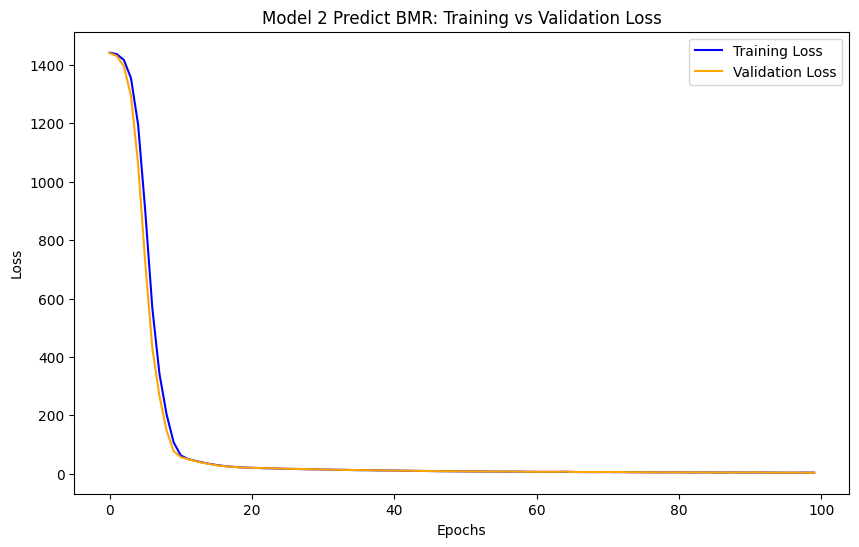

In [12]:
# Visualisasi Training Loss dan Validation Loss
def plot_training_history(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualisasi Model 1
plot_training_history(history1, 'Model 1 Predict Calories to Maintain Weight: Training vs Validation Loss')

# Visualisasi Model 2
plot_training_history(history2, 'Model 2 Predict BMR: Training vs Validation Loss')

### Model 3 Recomendation Nutrition

Epoch 1/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3548 - accuracy: 0.8836 - val_loss: 0.3523 - val_accuracy: 0.8839
Epoch 2/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3489 - accuracy: 0.8849 - val_loss: 0.3502 - val_accuracy: 0.8839
Epoch 3/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3480 - accuracy: 0.8849 - val_loss: 0.3500 - val_accuracy: 0.8839
Epoch 4/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3477 - accuracy: 0.8849 - val_loss: 0.3494 - val_accuracy: 0.8839
Epoch 5/30
943/943 [==============================] - 3s 4ms/step - loss: 0.3470 - accuracy: 0.8849 - val_loss: 0.3495 - val_accuracy: 0.8839
Epoch 6/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3466 - accuracy: 0.8849 - val_loss: 0.3485 - val_accuracy: 0.8839
Epoch 7/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3463 - accuracy: 0.8849 - val_loss: 0.3495 - val_accuracy: 0.8839
Epoch 

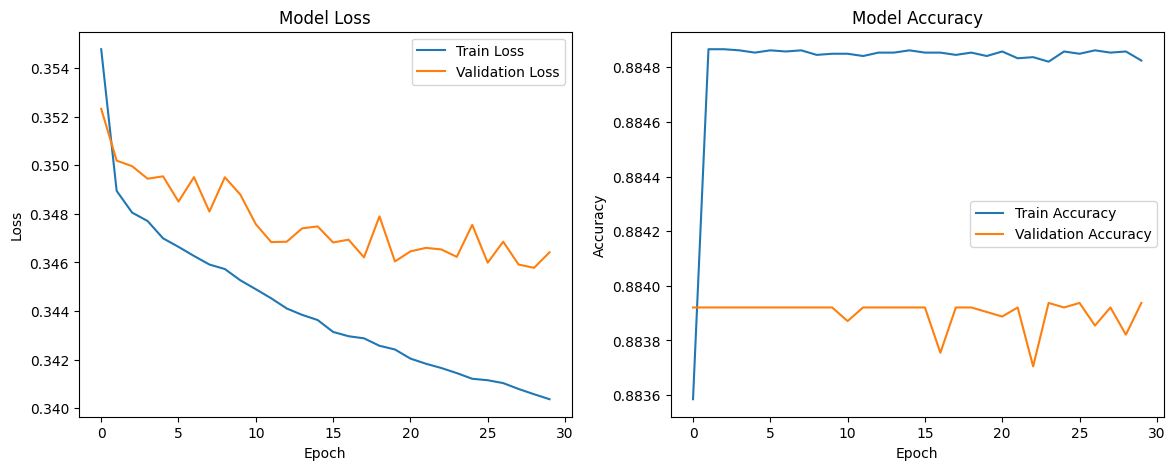

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Preprocessing
label_encoder = LabelEncoder()
filtered_data_combined['Diet_Type'] = label_encoder.fit_transform(filtered_data_combined['Diet_Type'])

# Features dan Target
X = filtered_data_combined.drop(['Name', 'Diet_Type'], axis=1)  # Hapus kolom tidak relevan
y = filtered_data_combined['Diet_Type']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Recommendation Food Diet
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=256)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Visualisasi Hasil Training
plt.figure(figsize=(14, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

2356/2356 [==============================] - 4s 1ms/step


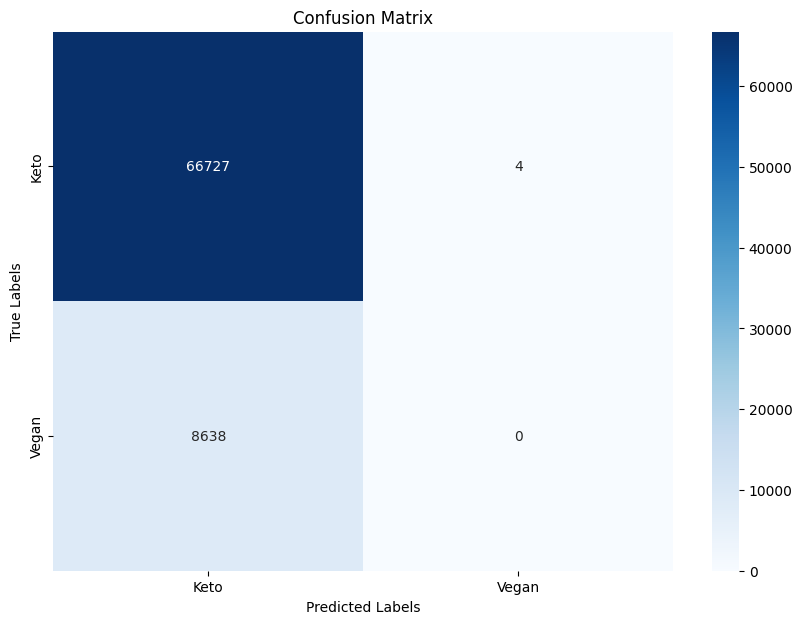

Classification Report:
               precision    recall  f1-score   support

        Keto       0.89      1.00      0.94     66731
       Vegan       0.00      0.00      0.00      8638

    accuracy                           0.89     75369
   macro avg       0.44      0.50      0.47     75369
weighted avg       0.78      0.89      0.83     75369

Test Accuracy: 0.8853


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Evaluasi pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Akurasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

In [16]:
# Data baru untuk prediksi
new_data = np.array([[398.9, 9.6, 2.6, 48.4, 201.0, 49.6, 13.5, 6.4, 30.0]])  # Contoh data
new_data_scaled = scaler.transform(new_data)  # Normalisasi data

# Prediksi diet tipe
prediction = model.predict(new_data_scaled)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
print(f"Predicted Diet Type: {predicted_label[0]}")

1/1 [==============================] - 0s 41ms/step
Predicted Diet Type: Keto


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the target column (Diet_Type)
label_encoder = LabelEncoder()
filtered_data_combined['Diet_Type'] = label_encoder.fit_transform(filtered_data_combined['Diet_Type'])

# Features and target
X = filtered_data_combined.drop(['Name', 'Diet_Type'], axis=1)  # Drop non-numerical or identifier columns
y = filtered_data_combined['Diet_Type']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(filtered_data_combined['Diet_Type'].unique()), activation='softmax')  # Output layer
])
# Compile model
model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train model
history3 = model3.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
7537/7537 [==============================] - 24s 3ms/step - loss: 0.3521 - accuracy: 0.8844 - val_loss: 0.3506 - val_accuracy: 0.8839
Epoch 2/20
7537/7537 [==============================] - 19s 3ms/step - loss: 0.3489 - accuracy: 0.8849 - val_loss: 0.3502 - val_accuracy: 0.8839
Epoch 3/20
7537/7537 [==============================] - 19s 3ms/step - loss: 0.3480 - accuracy: 0.8849 - val_loss: 0.3497 - val_accuracy: 0.8839
Epoch 4/20
7537/7537 [==============================] - 20s 3ms/step - loss: 0.3474 - accuracy: 0.8849 - val_loss: 0.3491 - val_accuracy: 0.8839
Epoch 5/20
7537/7537 [==============================] - 18s 2ms/step - loss: 0.3471 - accuracy: 0.8849 - val_loss: 0.3485 - val_accuracy: 0.8839
Epoch 6/20
7537/7537 [==============================] - 16s 2ms/step - loss: 0.3466 - accuracy: 0.8849 - val_loss: 0.3485 - val_accuracy: 0.8839
Epoch 7/20
7537/7537 [==============================] - 13s 2ms/step - loss: 0.3462 - accuracy: 0.8849 - val_loss: 0.3479 - val_ac

In [72]:
# Evaluate model
loss, accuracy = model3.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

2356/2356 [==============================] - 3s 1ms/step - loss: 0.3441 - accuracy: 0.8854
Test Accuracy: 0.89


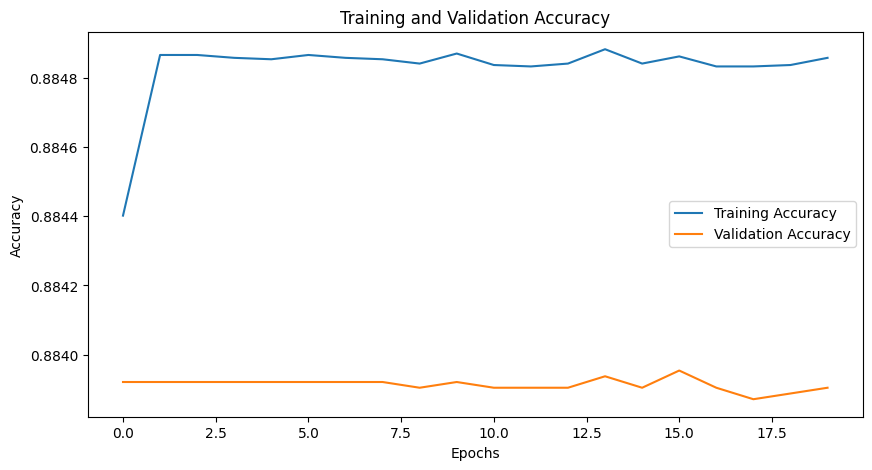

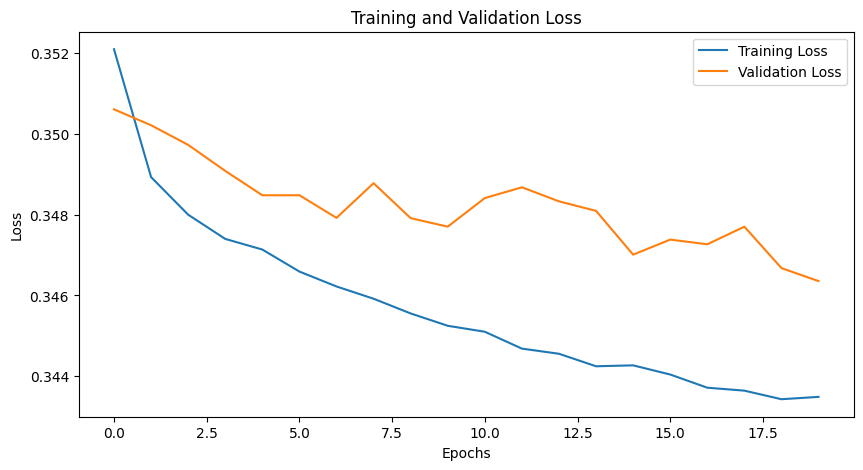

In [73]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Function Definitions for User Input

In [74]:
# def output_model(age, height, weight, gender, activity_level, food_preference, accuracy_model1, accuracy_model2):
#     try:
#         # Calculate BMI
#         BMI = weight / ((height / 100) ** 2)

#         # Predict BMR using Model 2
#         BMR_input = pd.DataFrame({
#             'age': [age],
#             'height(cm)': [height],
#             'weight(kg)': [weight],
#             'gender': [gender]
#         })
#         if not hasattr(scaler2, "mean_"):
#             raise ValueError("Scaler2 is not fitted yet. Fit it before using.")

#         BMR_scaled = scaler2.transform(BMR_input)
#         BMR = model2.predict(BMR_scaled)[0][0]

#         # Predict daily calorie needs using Model 1
#         input_data = pd.DataFrame({
#             'age': [age],
#             'height(cm)': [height],
#             'weight(kg)': [weight],
#             'gender': [gender],
#             'BMI': [BMI],
#             'BMR': [BMR],
#             'activity_level': [activity_level]
#         })
#         if not hasattr(scaler1, "mean_"):
#             raise ValueError("Scaler1 is not fitted yet. Fit it before using.")

#         scaled_input1 = scaler1.transform(input_data)
#         daily_calorie_needs = model1.predict(scaled_input1)[0][0]

#         # Filter food preference in Dataset
#         filtered_food = df_combined[df_combined['Name'].str.contains(food_preference, case=False, na=False)]

#         if filtered_food.empty:
#             return f"No data found for the food: {food_preference}"

#         # Sort filtered food by calories in ascending order
#         filtered_food = filtered_food.sort_values(by='Calories')

#         # Add cumulative calories until total matches BMR
#         cumulative_calories_byBMR = 0
#         recommended_food_byBMR = []

#         for _, row in filtered_food.iterrows():
#             if cumulative_calories_byBMR + row['Calories'] <= BMR:
#                 recommended_food_byBMR.append(row)
#                 cumulative_calories_byBMR += row['Calories']
#             else:
#                 break

#         # Convert recommended food list to DataFrame Daily Calorie Needs
#         recommended_food_df_byBMR = pd.DataFrame(recommended_food_byBMR)
        
#         # Add cumulative calories until total matches Daily Calorie Needs
#         cumulative_calories_ByDailyCalorieNeeds = 0
#         recommended_food_ByDailyCalorieNeeds = []

#         for _, row in filtered_food.iterrows():
#             if cumulative_calories_ByDailyCalorieNeeds + row['Calories'] <= daily_calorie_needs:
#                 recommended_food_ByDailyCalorieNeeds.append(row)
#                 cumulative_calories_ByDailyCalorieNeeds += row['Calories']
#             else:
#                 break

#         # Convert recommended food list to DataFrame Daily Calorie Needs
#         recommended_food_df_ByDailyCalorieNeeds = pd.DataFrame(recommended_food_ByDailyCalorieNeeds)

#         return {
#             "Daily Calorie Needs": daily_calorie_needs,
#             "BMR": BMR,
#             "Food Preference Analysis": filtered_food[['Name', 'Calories', 'Fat(g)', 'SaturatedFat(g)', 'Cholesterol(mg)', 'Sodium(mg)',
#                                                         'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)', 'Protein(g)']],
#             "Recommended Food Based on Calories By BMR": recommended_food_df_byBMR,
#             "Total Calories By BMR": cumulative_calories_byBMR,
#             "Recommendation Status BMR": "Calories match BMR" if cumulative_calories_byBMR <= BMR else "Calories do not match BMR",
#             "Recommended Food Based on Calories By Daily Calorie Needs": recommended_food_df_ByDailyCalorieNeeds,
#             "Total Calories By Daily Calorie Needs": cumulative_calories_ByDailyCalorieNeeds,
#             "Recommendation Status Daily Calorie Needs": "Calories match Daily Calorie Needs" if cumulative_calories_ByDailyCalorieNeeds <= daily_calorie_needs else "Calories do not match Daily Calorie Needs",
#             "Model1 Accuracy (Daily Calorie Needs)": accuracy_model1,
#             "Model2 Accuracy (BMR)": accuracy_model2
#         }

#     except Exception as e:
#         return f"Error: {e}"

In [ ]:
# # Fungsi utama untuk menghitung rekomendasi makanan
# def output_model(age, height, weight, gender, activity_level, food_preference, diet_category, has_gastric_issue, accuracy_model1, accuracy_model2):
#     try:
#         # Hitung BMI
#         BMI = weight / ((height / 100) ** 2)

#         # Prediksi BMR menggunakan Model 2
#         BMR_input = pd.DataFrame({
#             'age': [age],
#             'height(cm)': [height],
#             'weight(kg)': [weight],
#             'gender': [gender]
#         })
#         BMR_scaled = scaler2.transform(BMR_input)
#         BMR = model2.predict(BMR_scaled)[0][0]

#         # Prediksi kebutuhan kalori harian menggunakan Model 1
#         input_data = pd.DataFrame({
#             'age': [age],
#             'height(cm)': [height],
#             'weight(kg)': [weight],
#             'gender': [gender],
#             'BMI': [BMI],
#             'BMR': [BMR],
#             'activity_level': [activity_level]
#         })
#         scaled_input1 = scaler1.transform(input_data)
#         daily_calorie_needs = model1.predict(scaled_input1)[0][0]

#         # Filter makanan berdasarkan preferensi pengguna
#         filtered_food = df_combined[df_combined['Name'].str.contains(food_preference, case=False, na=False)]

#         if filtered_food.empty:
#             return f"No data found for the food: {food_preference}"

#         # Filter berdasarkan kategori diet
#         if diet_category.lower() == "vegan":
#             filtered_food = filtered_food[filtered_food['Diet_Type'].str.contains("Vegan", case=False, na=False)]

#         # Penyesuaian jika pengguna memiliki riwayat maag
#         if has_gastric_issue:
#             filtered_food = filtered_food[
#                 (filtered_food['Fat(g)'] < 10) &
#                 (filtered_food['Carbohydrate(g)'] < 50)|
#                 (filtered_food['Protein(g)'] >= 50)&
#                 (filtered_food['Cholesterol(mg)'] <= 300) &
#                 (filtered_food['Sodium(mg)'] <= 2300) &
#                 (filtered_food['Fiber(g)'] >= (25 if gender == 1 else 38)) &
#                 (filtered_food['Sugar(g)'] <= 40) 
#             ]

#         # Urutkan makanan berdasarkan kalori terbesar
#         filtered_food = filtered_food.sort_values(by='Calories', ascending=False)

#         # Pilih hingga 10 makanan dengan total kalori tidak melebihi kebutuhan harian
#         cumulative_calories = 0
#         recommended_food = []

#         for _, row in filtered_food.iterrows():
#             if len(recommended_food) < 10 and (cumulative_calories + row['Calories'] <= daily_calorie_needs):
#                 recommended_food.append(row)
#                 cumulative_calories += row['Calories']

#         # Jika tidak ada makanan yang memenuhi syarat
#         if not recommended_food:
#             return f"No recommended food meets the criteria for {food_preference}."

#         # Buat DataFrame dari makanan yang direkomendasikan
#         recommended_food_df = pd.DataFrame(recommended_food)

#         return {
#             "Daily Calorie Needs": daily_calorie_needs,
#             "BMR": BMR,
#             "Filtered Food Data": filtered_food[['Name', 'Calories', 'Fat(g)', 'SaturatedFat(g)', 'Cholesterol(mg)', 'Sodium(mg)',
#                                                  'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)', 'Protein(g)']],
#             "Recommended Food": recommended_food_df,
#             "Total Calories By Recommendation": cumulative_calories,
#             "Model1 Accuracy (Daily Calorie Needs)": accuracy_model1,
#             "Model2 Accuracy (BMR)": accuracy_model2
#         }

#     except Exception as e:
#         return f"Error: {e}"

## Test Input from User

**Sudah ada Indikasi Berat Badan Ideal (Dengan Perhitungan Rumus Broca)**<br>
**Rumus Broca**<br>
Rumus ini memperhitungkan perbedaan jenis kelamin. Rumusnya adalah: <br>
**Berat badan ideal laki-laki (kg) = [tinggi badan (cm) -100] - [(tinggi badan (cm) -100) x 10%]**<br>
**Berat badan ideal perempuan (kg) = [tinggi badan (cm) -100] + [(tinggi badan (cm) -100) x 15%]**

In [ ]:
# Fungsi utama untuk menghitung rekomendasi makanan
def output_model(age, height, weight, gender, activity_level, food_preference, diet_category, has_gastric_issue, accuracy_model1, accuracy_model2):
    try:
        # Hitung BMI
        BMI = weight / ((height / 100) ** 2)
        
        # Hitung Berat Badan Ideal berdasarkan Rumus Broca
        if gender == 0:  # Laki-laki
            ideal_weight = (height - 100) - (0.10 * (height - 100))
        else:  # Perempuan
            ideal_weight = (height - 100) + (0.15 * (height - 100))
        
        # Hitung BMI berdasarkan berat ideal
        ideal_BMI = ideal_weight / ((height / 100) ** 2)
        
        # Hitung selisih berat badan
        weight_difference = weight - ideal_weight

        # Prediksi BMR menggunakan Model 2
        BMR_input = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender]
        })
        BMR_scaled = scaler2.transform(BMR_input)
        BMR = model2.predict(BMR_scaled)[0][0]

        # Prediksi kebutuhan kalori harian menggunakan Model 1
        input_data = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender],
            'BMI': [BMI],
            'BMR': [BMR],
            'activity_level': [activity_level]
        })
        scaled_input1 = scaler1.transform(input_data)
        daily_calorie_needs = model1.predict(scaled_input1)[0][0]

        # Filter makanan berdasarkan preferensi pengguna
        filtered_food = df_combined[df_combined['Name'].str.contains(food_preference, case=False, na=False)]

        if filtered_food.empty:
            return f"No data found for kategori Diet Type of {diet_category} food: {food_preference}"

        # Filter berdasarkan kategori diet
        if diet_category.lower() == "vegan":
            filtered_food = filtered_food[filtered_food['Diet_Type'].str.contains("Vegan", case=False, na=False)]

        # Penyesuaian jika pengguna memiliki riwayat maag
        if has_gastric_issue:
            filtered_food = filtered_food[
                (filtered_food['Fat(g)'] < 10) &
                (filtered_food['Carbohydrate(g)'] < 50)|
                (filtered_food['Protein(g)'] >= 50)&
                (filtered_food['Cholesterol(mg)'] <= 300) &
                (filtered_food['Sodium(mg)'] <= 2300) &
                (filtered_food['Fiber(g)'] >= (25 if gender == 1 else 38)) &
                (filtered_food['Sugar(g)'] <= 40) &
                (~filtered_food['Name'].str.contains("spicy|acidic|citrus|orange|lemon|pineapple|tomato|onion|chocolate|cheese|nuts|tart|coffee|Alcohol|beer|wine|vodka", case=False, na=False))
            ]

        # Urutkan makanan berdasarkan kalori terbesar
        filtered_food = filtered_food.sort_values(by='Calories', ascending=False)

        # Pilih hingga 10 makanan dengan total kalori tidak melebihi kebutuhan harian
        cumulative_calories = 0
        recommended_food = []

        for _, row in filtered_food.iterrows():
            if len(recommended_food) < 10 and (cumulative_calories + row['Calories'] <= daily_calorie_needs):
                recommended_food.append(row)
                cumulative_calories += row['Calories']

        # Jika tidak ada makanan yang memenuhi syarat
        if not recommended_food:
            return f"No recommended food meets the criteria for {food_preference}."
        
        # Tentukan pola makan
        eating_pattern = "3x sehari" if activity_level > 2 else "2x sehari"

        # Buat DataFrame dari makanan yang direkomendasikan
        recommended_food_df = pd.DataFrame(recommended_food)

        # Tambahkan hasil berat ideal, BMI ideal, dan selisih berat badan ke output
        return {
            "Daily Calorie Needs": daily_calorie_needs,
            "BMR": BMR,
            "Filtered Food Data": filtered_food[['Name', 'Calories', 'Fat(g)', 'SaturatedFat(g)', 'Cholesterol(mg)', 'Sodium(mg)',
                                                 'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)', 'Protein(g)']],
            "Recommended Food": recommended_food_df,
            "Total Calories By Recommendation": cumulative_calories,
            "Model1 Accuracy (Daily Calorie Needs)": accuracy_model1,
            "Model2 Accuracy (BMR)": accuracy_model2,
            "Eating Pattern Recommendation": eating_pattern,
            "BMI": BMI,
            "Ideal Weight": ideal_weight,
            "Ideal BMI": ideal_BMI,
            "Weight Difference": weight_difference
        }
    except Exception as e:
        return f"Error: {e}"

# Fungsi untuk mendapatkan input dari user
def get_float_input(prompt, min_value=None, max_value=None):
    while True:
        try:
            value = float(input(prompt))
            if min_value is not None and value < min_value:
                print(f"Value must be at least {min_value}. Try again.")
                continue
            if max_value is not None and value > max_value:
                print(f"Value must not exceed {max_value}. Try again.")
                continue
            return value
        except ValueError:
            print("Invalid input. Please enter a number.")

def get_string_input(prompt):
    while True:
        value = input(prompt).strip()
        if value:
            return value
        else:
            print("Input cannot be empty. Please try again.")

def get_yes_no_input(prompt):
    while True:
        value = input(prompt).strip().lower()
        if value in ['yes', 'no']:
            return value == 'yes'
        print("Invalid input. Please enter 'yes' or 'no'.")

# Input parameters dari user
diet_type = get_string_input("Enter your diet type (e.g., Keto, Vegan): ").capitalize()
has_mag_history = get_yes_no_input("Do you have a history of gastritis or GERD? (yes/no): ")
age = get_float_input("Enter your age: ", min_value=0)
height = get_float_input("Enter your height (in cm): ", min_value=0)
weight = get_float_input("Enter your weight (in kg): ", min_value=0)
gender = get_float_input("Enter your gender (0 for male, 1 for female): ", min_value=0, max_value=1)
activity_level = get_float_input("Enter your activity level (1-5): ", min_value=1, max_value=5)
food_preference = get_string_input("Enter your favorite food name: ")

# Display input dari user
print("\n--- User Input Data ---")
print(f"Diet Type: {diet_type}")
print(f"History of Gastritis or GERD: {'Yes' if has_mag_history else 'No'}")
print(f"Age: {age:.2f}")
print(f"Height: {height:.2f} cm")
print(f"Weight: {weight:.2f} kg")
print(f"Gender: {'Male' if gender == 0 else 'Female'}")
print(f"Activity Level: {activity_level:.2f}")
print(f"Favorite Food: {food_preference}")

# Jalankan model
results = output_model(age, height, weight, gender, activity_level, food_preference, diet_type, has_mag_history, r2_1, r2_2)

if isinstance(results, dict):
    print(f"\n--- Results ---\n")
    print(f"Eating Pattern Recommendation: {results['Eating Pattern Recommendation']}")
    print(f"Daily Calorie Needs: {float(results['Daily Calorie Needs']):.2f}")
    print(f"BMR: {float(results['BMR']):.2f}")
    print(f"Ideal Weight: {float(results['Ideal Weight']):.2f} kg")
    print(f"Ideal BMI: {float(results['Ideal BMI']):.2f}")
    print(f"BMI Now : {float(results['BMI']):.2f}")
    print(f"Weight Now: {weight:.2f} kg")
    print(f"Weight Difference: {float(results['Weight Difference']):.2f} kg")
    print("Filtered Food Data:")
    print(results["Filtered Food Data"])
    print("\nRecommended Food:")
    print(results["Recommended Food"])
    print(f"\nTotal Calories By Recommendation: {results['Total Calories By Recommendation']:.2f}")
    print(f"Model1 Accuracy (Daily Calorie Needs): {results['Model1 Accuracy (Daily Calorie Needs)']:.2f}")
    print(f"Model2 Accuracy (BMR): {results['Model2 Accuracy (BMR)']:.2f}")
else:
    print(results)
    

**Sudah ada Indikasi Berat Bada Ideal**

In [ ]:
# Fungsi utama untuk menghitung rekomendasi makanan
def output_model(age, height, weight, gender, activity_level, food_preference, diet_category, has_gastric_issue, accuracy_model1, accuracy_model2):
    try:
        # Hitung BMI
        BMI = weight / ((height / 100) ** 2)
        
        # Perhitungan berat ideal
        if gender == 0:  # Male
            ideal_weight = 50 + 0.9 * (height - 152.4)
        else:  # Female
            ideal_weight = 45.5 + 0.9 * (height - 152.4)
        
        # Hitung BMI berdasarkan berat ideal
        ideal_BMI = ideal_weight / ((height / 100) ** 2)
        
        # Hitung selisih berat badan
        weight_difference = weight - ideal_weight

        # Prediksi BMR menggunakan Model 2
        BMR_input = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender]
        })
        BMR_scaled = scaler2.transform(BMR_input)
        BMR = model2.predict(BMR_scaled)[0][0]

        # Prediksi kebutuhan kalori harian menggunakan Model 1
        input_data = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender],
            'BMI': [BMI],
            'BMR': [BMR],
            'activity_level': [activity_level]
        })
        scaled_input1 = scaler1.transform(input_data)
        daily_calorie_needs = model1.predict(scaled_input1)[0][0]

        # Filter makanan berdasarkan preferensi pengguna
        filtered_food = df_combined[df_combined['Name'].str.contains(food_preference, case=False, na=False)]

        if filtered_food.empty:
            return f"No data found for kategori Diet Type of {diet_category} food: {food_preference}"

        # Filter berdasarkan kategori diet
        if diet_category.lower() == "vegan":
            filtered_food = filtered_food[filtered_food['Diet_Type'].str.contains("Vegan", case=False, na=False)]

        # Penyesuaian jika pengguna memiliki riwayat maag
        if has_gastric_issue:
            filtered_food = filtered_food[
                (filtered_food['Fat(g)'] < 10) &
                (filtered_food['Carbohydrate(g)'] < 50)|
                (filtered_food['Protein(g)'] >= 50)&
                (filtered_food['Cholesterol(mg)'] <= 300) &
                (filtered_food['Sodium(mg)'] <= 2300) &
                (filtered_food['Fiber(g)'] >= (25 if gender == 1 else 38)) &
                (filtered_food['Sugar(g)'] <= 40) &
                (~filtered_food['Name'].str.contains("spicy|acidic|citrus|orange|lemon|pineapple|tomato|onion|chocolate|cheese|nuts|tart|coffee|Alcohol|beer|wine|vodka", case=False, na=False))
            ]

        # Urutkan makanan berdasarkan kalori terbesar
        filtered_food = filtered_food.sort_values(by='Calories', ascending=False)

        # Pilih hingga 10 makanan dengan total kalori tidak melebihi kebutuhan harian
        cumulative_calories = 0
        recommended_food = []

        for _, row in filtered_food.iterrows():
            if len(recommended_food) < 10 and (cumulative_calories + row['Calories'] <= daily_calorie_needs):
                recommended_food.append(row)
                cumulative_calories += row['Calories']

        # Jika tidak ada makanan yang memenuhi syarat
        if not recommended_food:
            return f"No recommended food meets the criteria for {food_preference}."
        
        # Tentukan pola makan
        eating_pattern = "3x sehari" if activity_level > 2 else "2x sehari"

        # Buat DataFrame dari makanan yang direkomendasikan
        recommended_food_df = pd.DataFrame(recommended_food)

        # Tambahkan hasil berat ideal, BMI ideal, dan selisih berat badan ke output
        return {
            "Daily Calorie Needs": daily_calorie_needs,
            "BMR": BMR,
            "Filtered Food Data": filtered_food[['Name', 'Calories', 'Fat(g)', 'SaturatedFat(g)', 'Cholesterol(mg)', 'Sodium(mg)',
                                                 'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)', 'Protein(g)']],
            "Recommended Food": recommended_food_df,
            "Total Calories By Recommendation": cumulative_calories,
            "Model1 Accuracy (Daily Calorie Needs)": accuracy_model1,
            "Model2 Accuracy (BMR)": accuracy_model2,
            "Eating Pattern Recommendation": eating_pattern,
            "BMI": BMI,
            "Ideal Weight": ideal_weight,
            "Ideal BMI": ideal_BMI,
            "Weight Difference": weight_difference
        }
    except Exception as e:
        return f"Error: {e}"

# Fungsi untuk mendapatkan input dari user
def get_float_input(prompt, min_value=None, max_value=None):
    while True:
        try:
            value = float(input(prompt))
            if min_value is not None and value < min_value:
                print(f"Value must be at least {min_value}. Try again.")
                continue
            if max_value is not None and value > max_value:
                print(f"Value must not exceed {max_value}. Try again.")
                continue
            return value
        except ValueError:
            print("Invalid input. Please enter a number.")

def get_string_input(prompt):
    while True:
        value = input(prompt).strip()
        if value:
            return value
        else:
            print("Input cannot be empty. Please try again.")

def get_yes_no_input(prompt):
    while True:
        value = input(prompt).strip().lower()
        if value in ['yes', 'no']:
            return value == 'yes'
        print("Invalid input. Please enter 'yes' or 'no'.")

# Input parameters dari user
diet_type = get_string_input("Enter your diet type (e.g., Keto, Vegan): ").capitalize()
has_mag_history = get_yes_no_input("Do you have a history of gastritis or GERD? (yes/no): ")
age = get_float_input("Enter your age: ", min_value=0)
height = get_float_input("Enter your height (in cm): ", min_value=0)
weight = get_float_input("Enter your weight (in kg): ", min_value=0)
gender = get_float_input("Enter your gender (0 for male, 1 for female): ", min_value=0, max_value=1)
activity_level = get_float_input("Enter your activity level (1-5): ", min_value=1, max_value=5)
food_preference = get_string_input("Enter your favorite food name: ")

# Display input dari user
print("\n--- User Input Data ---")
print(f"Diet Type: {diet_type}")
print(f"History of Gastritis or GERD: {'Yes' if has_mag_history else 'No'}")
print(f"Age: {age:.2f}")
print(f"Height: {height:.2f} cm")
print(f"Weight: {weight:.2f} kg")
print(f"Gender: {'Male' if gender == 0 else 'Female'}")
print(f"Activity Level: {activity_level:.2f}")
print(f"Favorite Food: {food_preference}")

# Jalankan model
results = output_model(age, height, weight, gender, activity_level, food_preference, diet_type, has_mag_history, r2_1, r2_2)

if isinstance(results, dict):
    print(f"\n--- Results ---\n")
    print(f"Eating Pattern Recommendation: {results['Eating Pattern Recommendation']}")
    print(f"Daily Calorie Needs: {float(results['Daily Calorie Needs']):.2f}")
    print(f"BMR: {float(results['BMR']):.2f}")
    print(f"Ideal Weight: {float(results['Ideal Weight']):.2f} kg")
    print(f"Ideal BMI: {float(results['Ideal BMI']):.2f}")
    print(f"BMI Now : {float(results['BMI']):.2f}")
    print(f"Weight Now: {weight:.2f} kg")
    print(f"Weight Difference: {float(results['Weight Difference']):.2f} kg")
    print("Filtered Food Data:")
    print(results["Filtered Food Data"])
    print("\nRecommended Food:")
    print(results["Recommended Food"])
    print(f"\nTotal Calories By Recommendation: {results['Total Calories By Recommendation']:.2f}")
    print(f"Model1 Accuracy (Daily Calorie Needs): {results['Model1 Accuracy (Daily Calorie Needs)']:.2f}")
    print(f"Model2 Accuracy (BMR): {results['Model2 Accuracy (BMR)']:.2f}")
else:
    print(results)
    


**Belum ada Indikasi Berat Bada Ideal**

In [32]:
# Fungsi utama untuk menghitung rekomendasi makanan
def output_model(age, height, weight, gender, activity_level, food_preference, diet_category, has_gastric_issue, accuracy_model1, accuracy_model2):
    try:
        # Hitung BMI
        BMI = weight / ((height / 100) ** 2)

        # Prediksi BMR menggunakan Model 2
        BMR_input = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender]
        })
        BMR_scaled = scaler2.transform(BMR_input)
        BMR = model2.predict(BMR_scaled)[0][0]

        # Prediksi kebutuhan kalori harian menggunakan Model 1
        input_data = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender],
            'BMI': [BMI],
            'BMR': [BMR],
            'activity_level': [activity_level]
        })
        scaled_input1 = scaler1.transform(input_data)
        daily_calorie_needs = model1.predict(scaled_input1)[0][0]

        # Filter makanan berdasarkan preferensi pengguna
        filtered_food = df_combined[df_combined['Name'].str.contains(food_preference, case=False, na=False)]

        if filtered_food.empty:
            return f"No data found for kategori Diet Type of {diet_category} food: {food_preference}"

        # Filter berdasarkan kategori diet
        if diet_category.lower() == "vegan":
            filtered_food = filtered_food[filtered_food['Diet_Type'].str.contains("Vegan", case=False, na=False)]

        # Penyesuaian jika pengguna memiliki riwayat maag
        if has_gastric_issue:
            filtered_food = filtered_food[
                (filtered_food['Fat(g)'] < 10) &
                (filtered_food['Carbohydrate(g)'] < 50)|
                (filtered_food['Protein(g)'] >= 50)&
                (filtered_food['Cholesterol(mg)'] <= 300) &
                (filtered_food['Sodium(mg)'] <= 2300) &
                (filtered_food['Fiber(g)'] >= (25 if gender == 1 else 38)) &
                (filtered_food['Sugar(g)'] <= 40) &
                (~filtered_food['Name'].str.contains("spicy|acidic|citrus|orange|lemon|pineapple|tomato|onion|chocolate|cheese|nuts|tart|coffee|Alcohol|beer|wine|vodka", case=False, na=False))
            ]

        # Urutkan makanan berdasarkan kalori terbesar
        filtered_food = filtered_food.sort_values(by='Calories', ascending=False)

        # Pilih hingga 10 makanan dengan total kalori tidak melebihi kebutuhan harian
        cumulative_calories = 0
        recommended_food = []

        for _, row in filtered_food.iterrows():
            if len(recommended_food) < 10 and (cumulative_calories + row['Calories'] <= daily_calorie_needs):
                recommended_food.append(row)
                cumulative_calories += row['Calories']

        # Jika tidak ada makanan yang memenuhi syarat
        if not recommended_food:
            return f"No recommended food meets the criteria for {food_preference}."
        
        # Tentukan pola makan
        eating_pattern = "3x sehari" if activity_level > 2 else "2x sehari"

        # Buat DataFrame dari makanan yang direkomendasikan
        recommended_food_df = pd.DataFrame(recommended_food)

        return {
            "Daily Calorie Needs": daily_calorie_needs,
            "BMR": BMR,
            "Filtered Food Data": filtered_food[['Name', 'Calories', 'Fat(g)', 'SaturatedFat(g)', 'Cholesterol(mg)', 'Sodium(mg)',
                                                 'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)', 'Protein(g)']],
            "Recommended Food": recommended_food_df,
            "Total Calories By Recommendation": cumulative_calories,
            "Model1 Accuracy (Daily Calorie Needs)": accuracy_model1,
            "Model2 Accuracy (BMR)": accuracy_model2,
            "Eating Pattern Recommendation": eating_pattern
        }

    except Exception as e:
        return f"Error: {e}"

# Fungsi untuk mendapatkan input dari user
def get_float_input(prompt, min_value=None, max_value=None):
    while True:
        try:
            value = float(input(prompt))
            if min_value is not None and value < min_value:
                print(f"Value must be at least {min_value}. Try again.")
                continue
            if max_value is not None and value > max_value:
                print(f"Value must not exceed {max_value}. Try again.")
                continue
            return value
        except ValueError:
            print("Invalid input. Please enter a number.")

def get_string_input(prompt):
    while True:
        value = input(prompt).strip()
        if value:
            return value
        else:
            print("Input cannot be empty. Please try again.")

def get_yes_no_input(prompt):
    while True:
        value = input(prompt).strip().lower()
        if value in ['yes', 'no']:
            return value == 'yes'
        print("Invalid input. Please enter 'yes' or 'no'.")

# Input parameters dari user
diet_type = get_string_input("Enter your diet type (e.g., Keto, Vegan): ").capitalize()
has_mag_history = get_yes_no_input("Do you have a history of gastritis or GERD? (yes/no): ")
age = get_float_input("Enter your age: ", min_value=0)
height = get_float_input("Enter your height (in cm): ", min_value=0)
weight = get_float_input("Enter your weight (in kg): ", min_value=0)
gender = get_float_input("Enter your gender (0 for male, 1 for female): ", min_value=0, max_value=1)
activity_level = get_float_input("Enter your activity level (1-5): ", min_value=1, max_value=5)
food_preference = get_string_input("Enter your favorite food name: ")

# Display input dari user
print("\n--- User Input Data ---")
print(f"Diet Type: {diet_type}")
print(f"History of Gastritis or GERD: {'Yes' if has_mag_history else 'No'}")
print(f"Age: {age:.2f}")
print(f"Height: {height:.2f} cm")
print(f"Weight: {weight:.2f} kg")
print(f"Gender: {'Male' if gender == 0 else 'Female'}")
print(f"Activity Level: {activity_level:.2f}")
print(f"Favorite Food: {food_preference}")

# Jalankan model
results = output_model(age, height, weight, gender, activity_level, food_preference, diet_type, has_mag_history, r2_1, r2_2)

if isinstance(results, dict):
    print(f"\n--- Results ---\n")
    print(f"Eating Pattern Recommendation: {results['Eating Pattern Recommendation']}")
    print(f"Daily Calorie Needs: {float(results['Daily Calorie Needs']):.2f}")
    print(f"BMR: {float(results['BMR']):.2f}")
    print("Filtered Food Data:")
    print(results["Filtered Food Data"])
    print("\nRecommended Food:")
    print(results["Recommended Food"])
    print(f"\nTotal Calories By Recommendation: {results['Total Calories By Recommendation']:.2f}")
    print(f"Model1 Accuracy (Daily Calorie Needs): {results['Model1 Accuracy (Daily Calorie Needs)']:.2f}")
    print(f"Model2 Accuracy (BMR): {results['Model2 Accuracy (BMR)']:.2f}")
else:
    print(results)  # Tampilkan pesan error jika terjadi kesalahan


--- User Input Data ---
Diet Type: Vegan
History of Gastritis or GERD: Yes
Age: 21.00
Height: 175.00 cm
Weight: 60.00 kg
Gender: Male
Activity Level: 1.00
Favorite Food: rice
1/1 [==============================] - 0s 17ms/step

--- Results ---

Eating Pattern Recommendation: 2x sehari
Daily Calorie Needs: 1870.04
BMR: 1704.77
Filtered Food Data:
                                                     Name  Calories  Fat(g)  \
8944                                  cinnamon curry rice    3892.1    94.2   
68249   puerto rican rice and beans (arroz con habichu...    1587.9    13.7   
55237                             dhansak with brown rice    1549.3    52.5   
345968                          mixed bean chili and rice    1176.8     7.3   
448352                           black bean and rice stew    1168.0     6.5   
...                                                   ...       ...     ...   
526109                           steamed veggies and rice       0.0     0.0   
392816             

In [76]:
# def get_float_input(prompt, min_value=None, max_value=None):
#     while True:
#         try:
#             value = float(input(prompt))
#             if min_value is not None and value < min_value:
#                 print(f"Value must be at least {min_value}. Try again.")
#                 continue
#             if max_value is not None and value > max_value:
#                 print(f"Value must not exceed {max_value}. Try again.")
#                 continue
#             return value
#         except ValueError:
#             print("Invalid input. Please enter a number.")

# def get_string_input(prompt):
#     while True:
#         value = input(prompt).strip()
#         if value:
#             return value
#         else:
#             print("Input cannot be empty. Please try again.")

# # Example input from user
# age = get_float_input("Enter your age: ", min_value=0)
# height = get_float_input("Enter your height (in cm): ", min_value=0)
# weight = get_float_input("Enter your weight (in kg): ", min_value=0)
# gender = get_float_input("Enter your gender (0 for male, 1 for female): ", min_value=0, max_value=1)
# activity_level = get_float_input("Enter your activity level (1-5): ", min_value=1, max_value=5)
# food_preference = get_string_input("Enter your food preference: ")

# # Get Results
# results = output_model(age, height, weight, gender, activity_level, food_preference, r2_1, r2_2)

# # Display Results
# if isinstance(results, dict):
#     print(f"\n--- Results ---\n")
#     print(f"Daily Calorie Needs: {results['Daily Calorie Needs']:.2f}")
#     print(f"BMR: {results['BMR']:.2f}")
#     print("Food Preference Analysis:")
#     print(results["Food Preference Analysis"])
#     print("\nRecommended Food Based on Calories By BMR:")
#     print(results["Recommended Food Based on Calories By BMR"])
#     print(f"\nTotal Calories By BMR: {results['Total Calories By BMR']:.2f}")
#     print(f"Recommendation Status By BMR: {results['Recommendation Status BMR']}")
#     print(f"Model2 Accuracy (BMR): {results['Model2 Accuracy (BMR)'] * 100:.2f}%\n")
#     print("\nRecommended Food Based on Calories By Daily Calorie Needs:")
#     print(results["Recommended Food Based on Calories By Daily Calorie Needs"])
#     print(f"\nTotal Calories By Daily Calorie Needs: {results['Total Calories By Daily Calorie Needs']:.2f}")
#     print(f"Recommendation Status By Daily Calorie Needs: {results['Recommendation Status Daily Calorie Needs']}")
#     print(f"Model1 Accuracy (Daily Calorie Needs): {results['Model1 Accuracy (Daily Calorie Needs)'] * 100:.2f}%")
# else:
#     print(results)



## Distribusi Prediksi vs Aktual

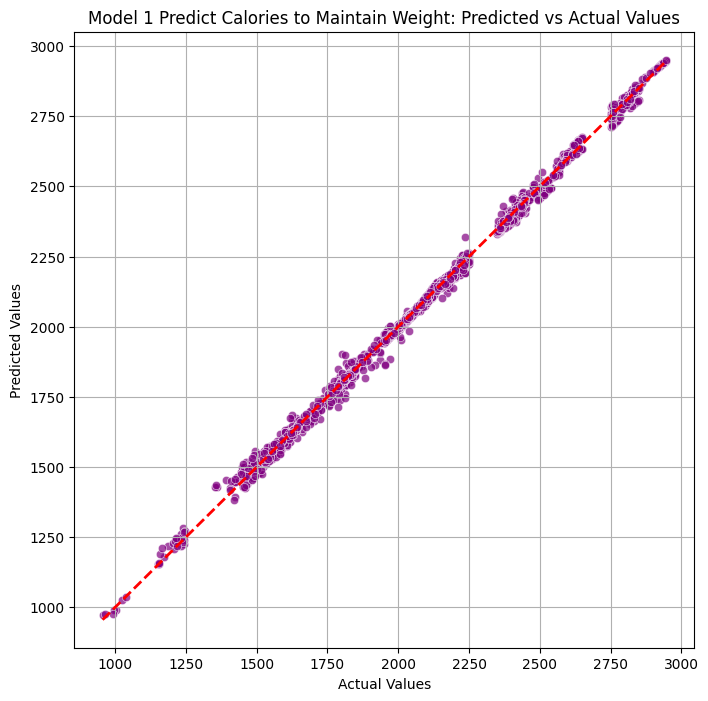

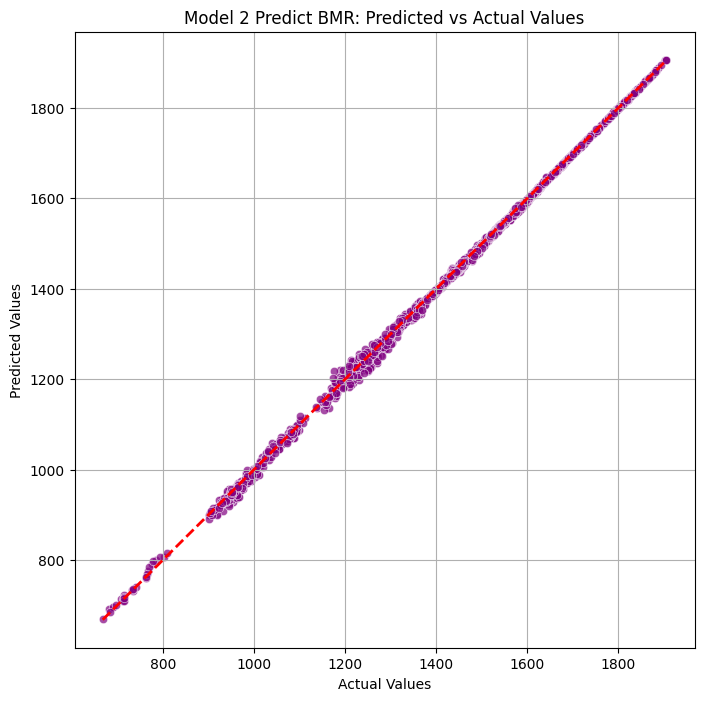

In [77]:
# Visualisasi Distribusi Prediksi vs Aktual
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7, color='purple')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualisasi Prediksi vs Aktual untuk Model 1
plot_predictions(y_test1, y_pred1.flatten(), 'Model 1 Predict Calories to Maintain Weight: Predicted vs Actual Values')

# Visualisasi Prediksi vs Aktual untuk Model 2
plot_predictions(y_test2, y_pred2.flatten(), 'Model 2 Predict BMR: Predicted vs Actual Values')

## Convert Model for Deployment

In [ ]:
model1.save('../models/model1.h5')
model2.save('../models/model2.h5')

joblib.dump(scaler1, '../models/scaler1.pkl')
joblib.dump(scaler2, '../models/scaler2.pkl')

model1.save('../Web-Browser/models/model1.h5')
model2.save('../Web-Browser/models/model2.h5')

joblib.dump(scaler1, '../Web-Browser/models/scaler1.pkl')
joblib.dump(scaler2, '../Web-Browser/models/scaler2.pkl')
# Menyimpan model dalam format SavedModel
# model.save('../models/food_recommendation_model', save_format='tf')


# model.save('../models/nutrition_model.h5')
# tfjs.converters.save_keras_model(model, '../tensorflowjs/model/')
# print("Model berhasil disimpan dalam format SavedModel.")

# # Konversi model ke format TensorFlow.js
# model_path = '../tensorflowjs/model'
# tfjs.converters.save_keras_model(model, model_path)
# print(f"Model berhasil dikonversi dan disimpan di folder: {model_path}")

In [79]:
# # Konversi model SavedModel ke TFLite
# converter = tf.lite.TFLiteConverter.from_saved_model("../models/food_recommendation_model")
# tflite_model = converter.convert()

# # Simpan model TFLite ke file
# with open("../models/food_recommendation_model.tflite", "wb") as f:
#     f.write(tflite_model)
# print("Model berhasil dikonversi ke format TFLite.")

In [80]:
# # Memuat model TFLite
# interpreter = tf.lite.Interpreter(model_path="../models/food_recommendation_model.tflite")
# interpreter.allocate_tensors()

# # Mendapatkan detail dari input dan output tensor
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Contoh data input untuk prediksi
# input_data = np.expand_dims(X_test[0], axis=0).astype(np.float32)

# # Menyiapkan input tensor
# interpreter.set_tensor(input_details[0]['index'], input_data)

# # Melakukan inferensi
# interpreter.invoke()

# # Mendapatkan hasil prediksi
# tflite_predictions = interpreter.get_tensor(output_details[0]['index'])
# print(f"Hasil prediksi TFLite: {tflite_predictions}")